# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [47]:
# Import essential libraries for data manipulation and analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)


numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [49]:
# Importing the file porter_data_1.csv
df = pd.read_csv("porter_data_1.csv")
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [51]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [53]:
# Convert categorical features to category type
categorical_cols = ['store_primary_category', 'order_protocol', "market_id"]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [55]:
# Calculate time taken in minutes
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
df["delivery_time_minutes"]

0         47.0
1         44.0
2         55.0
3         59.0
4         46.0
          ... 
175772    43.0
175773    62.0
175774    46.0
175775    45.0
175776    37.0
Name: delivery_time_minutes, Length: 175777, dtype: float64

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [57]:
# Extract the hour and day of week from the 'created_at' timestamp
df['created_hour'] = df['created_at'].dt.hour
df['created_day_of_week'] = df['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['created_at'].dt.dayofweek >= 5

In [59]:
# Drop unnecessary columns
columns_to_drop = [
    'market_id',
    'created_at',
    'actual_delivery_time'
]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [61]:
# Define target variable (y) and features (X)
y = df['delivery_time_minutes']

X = df.drop(columns=['delivery_time_minutes'])

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [63]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [65]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = X_train.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['category', 'object', 'bool']).columns.tolist()

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

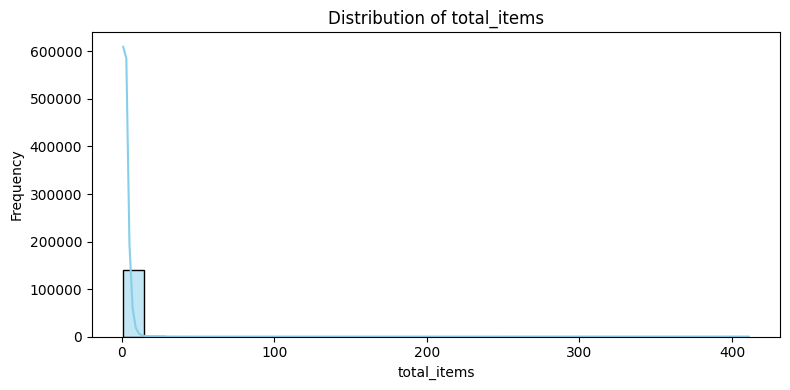

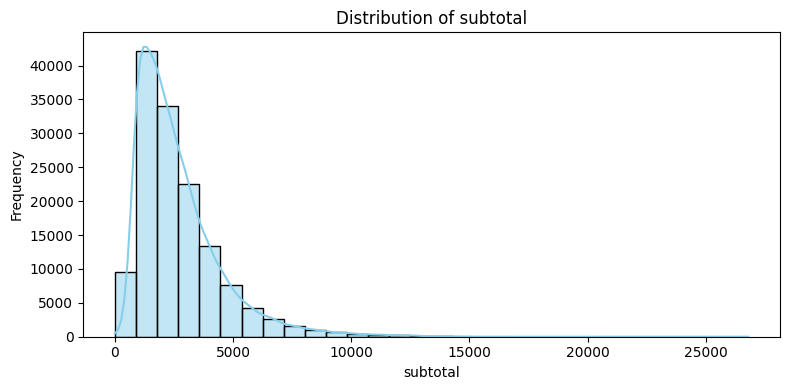

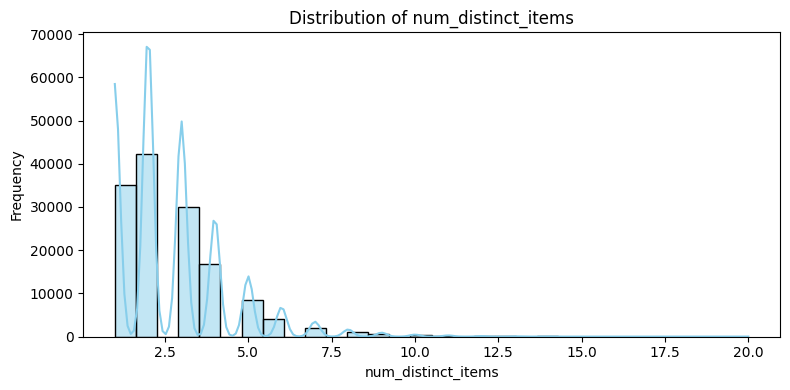

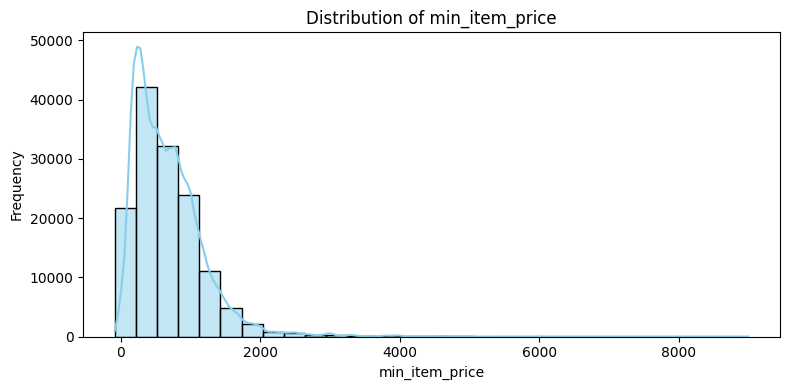

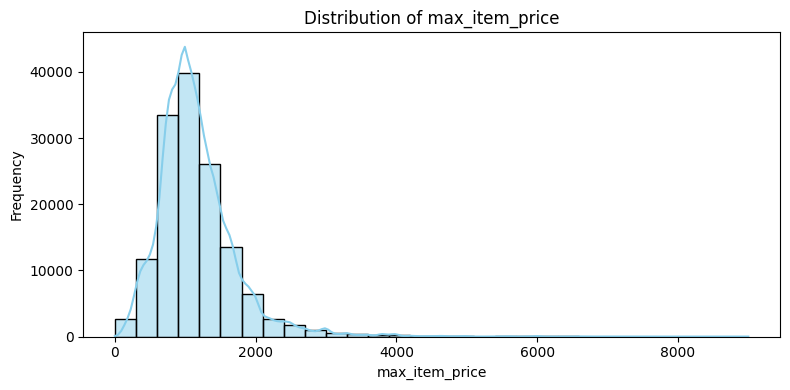

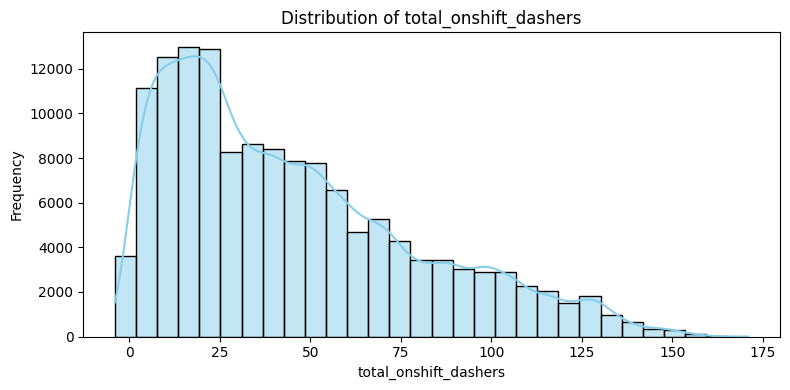

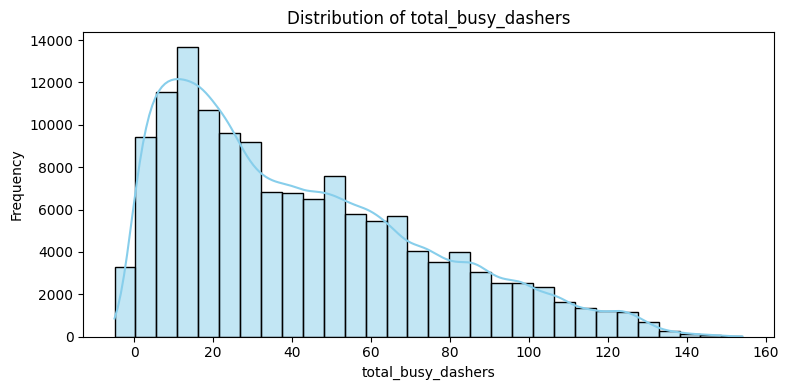

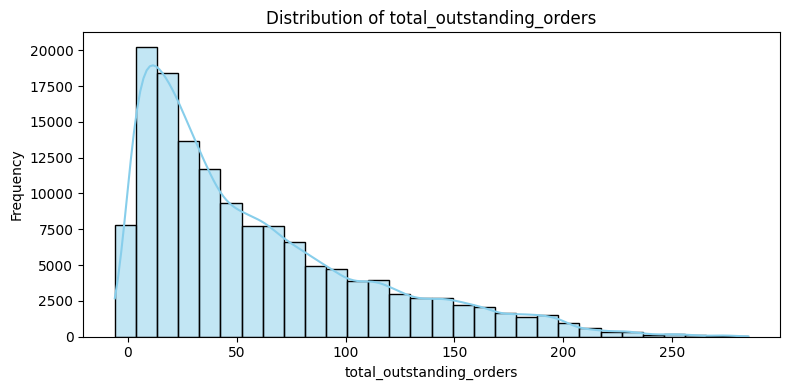

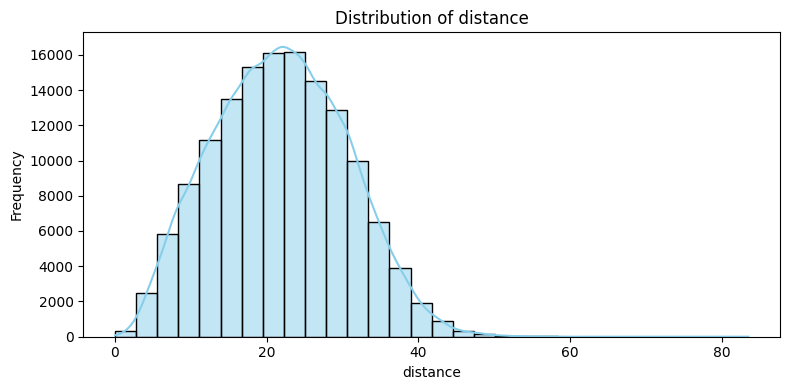

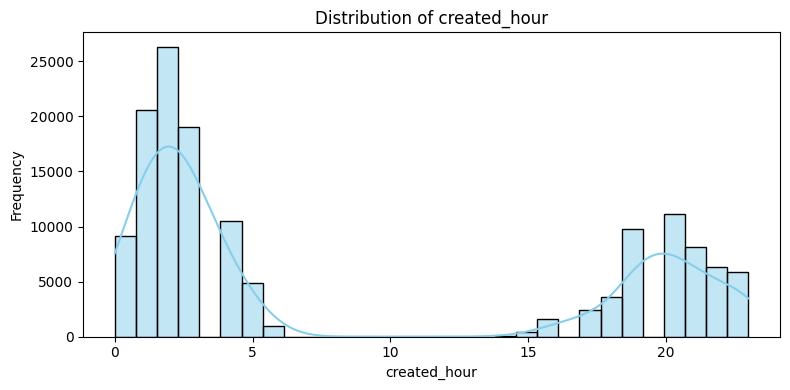

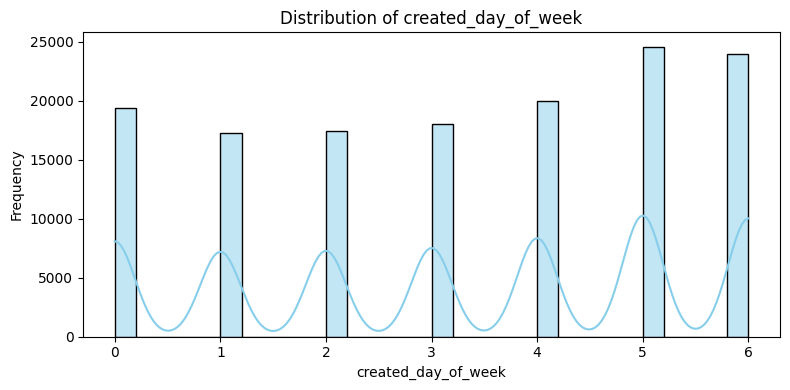

In [23]:
# Plot distributions for all numerical columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

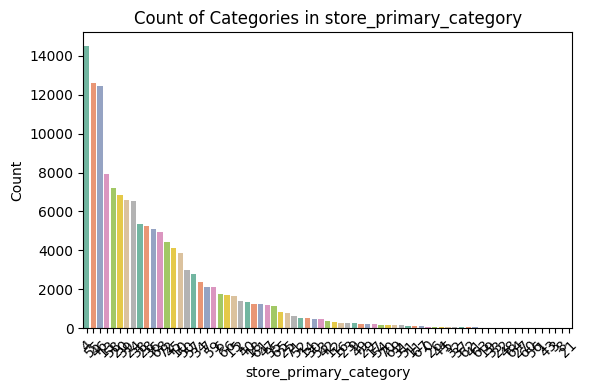

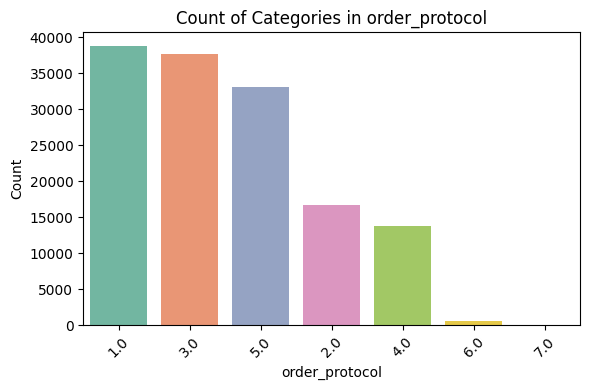

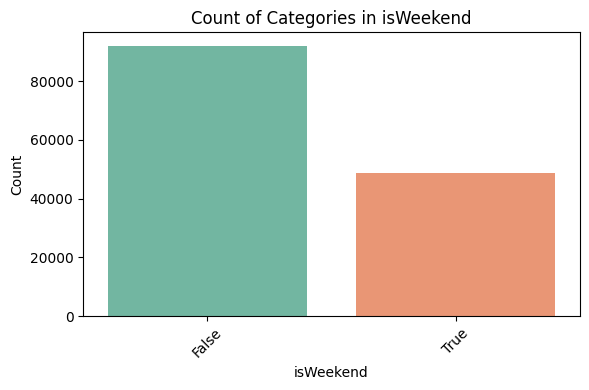

In [25]:
# Distribution of categorical columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=X_train, x=col, palette='Set2', order=X_train[col].value_counts().index)
    plt.title(f'Count of Categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

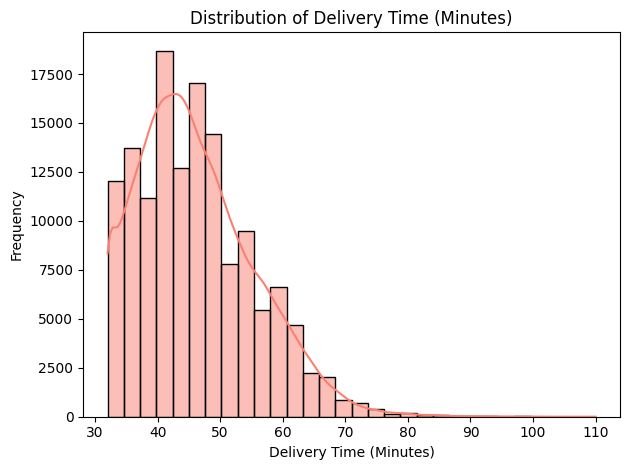

In [27]:
# Distribution of time_taken

sns.histplot(y_train, kde=True, bins=30, color='salmon')
plt.title('Distribution of Delivery Time (Minutes)')
plt.xlabel('Delivery Time (Minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

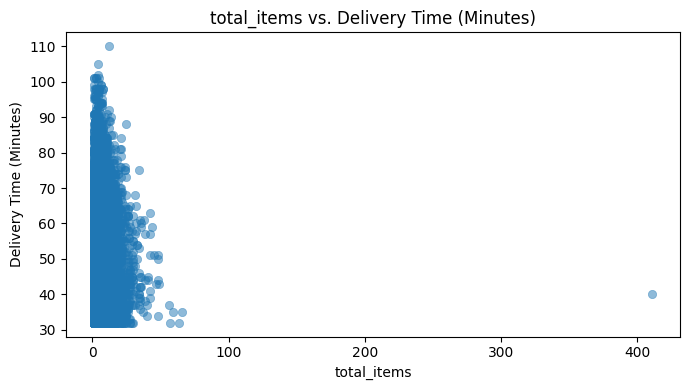

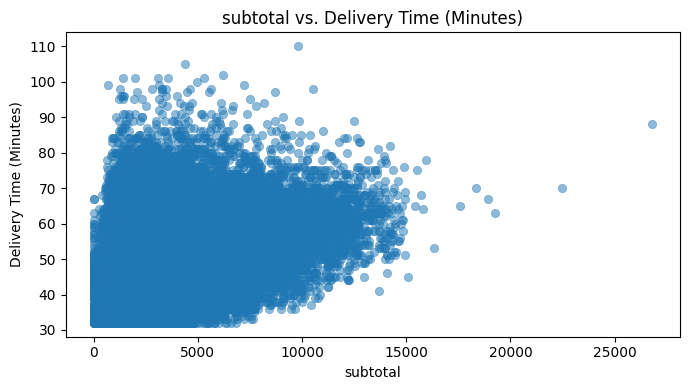

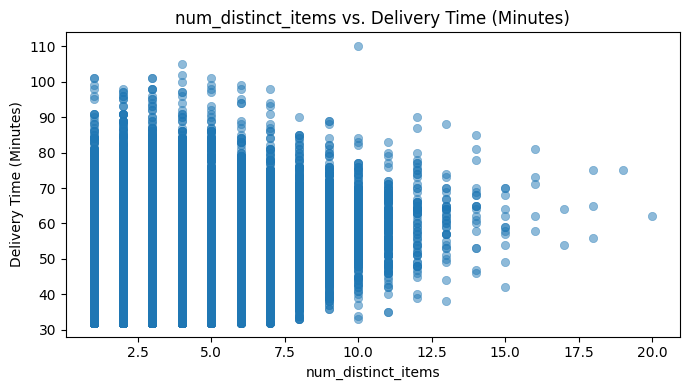

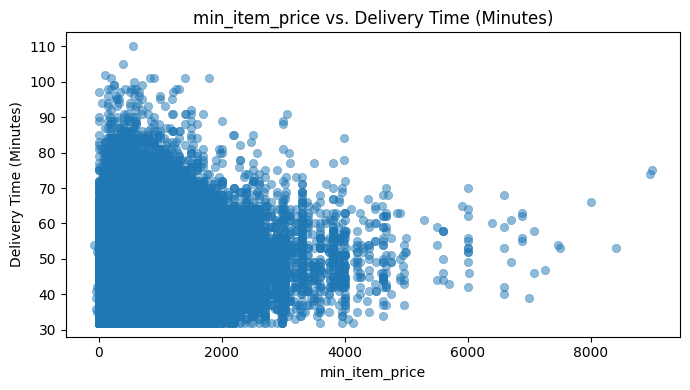

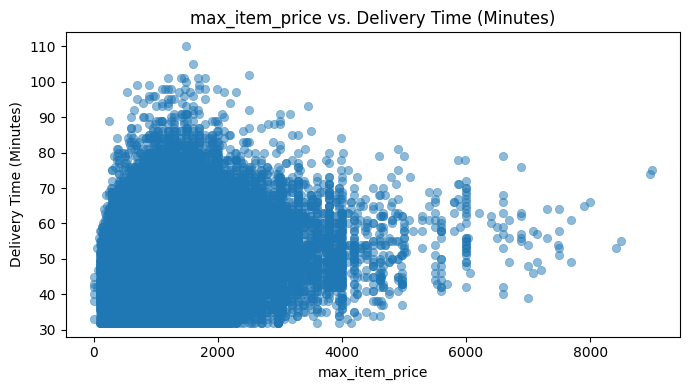

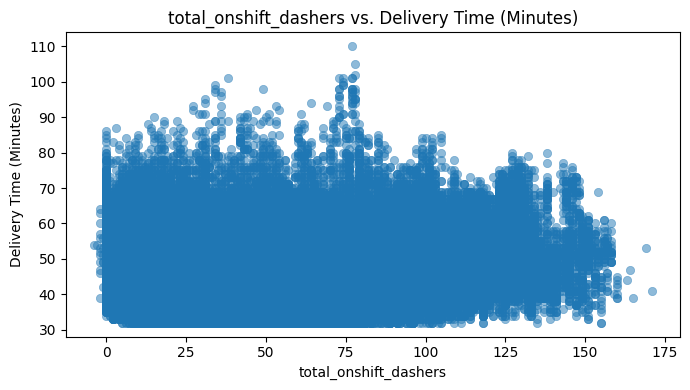

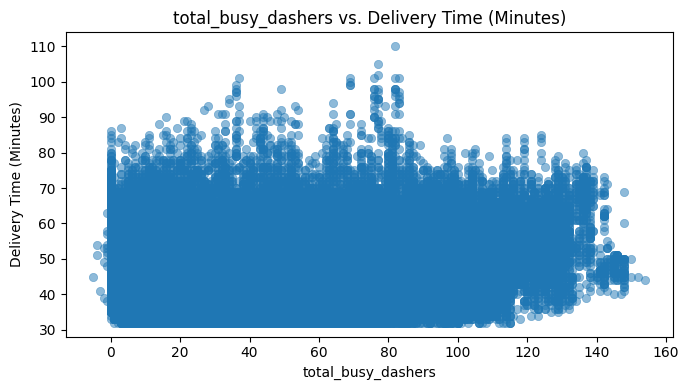

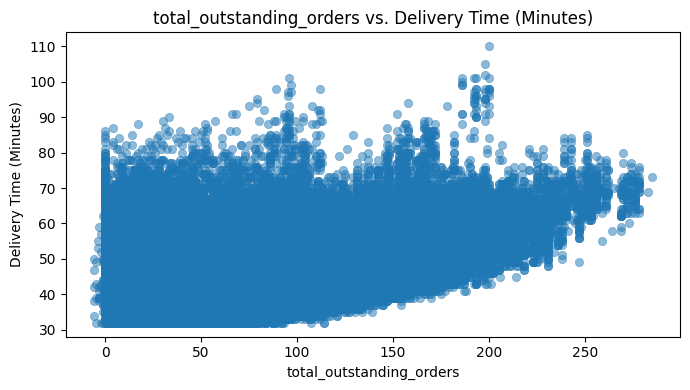

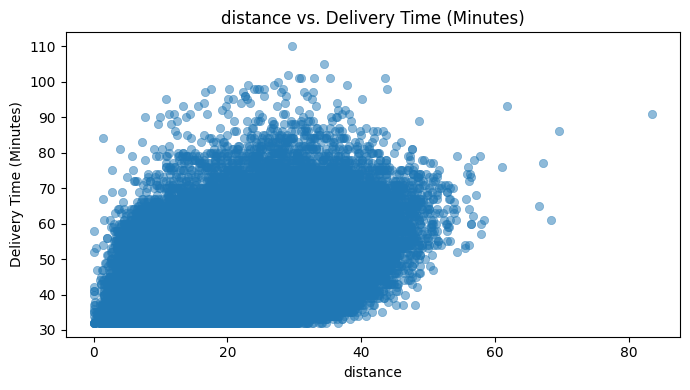

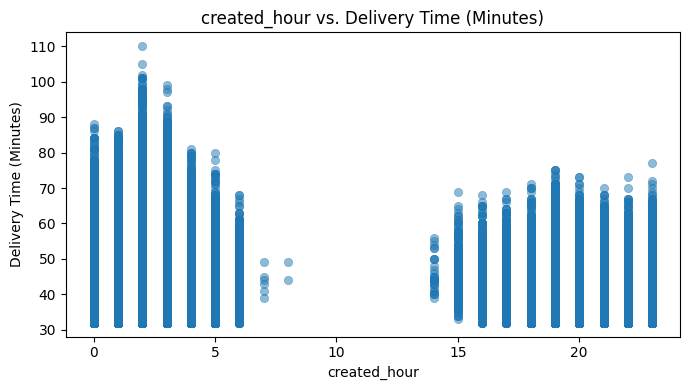

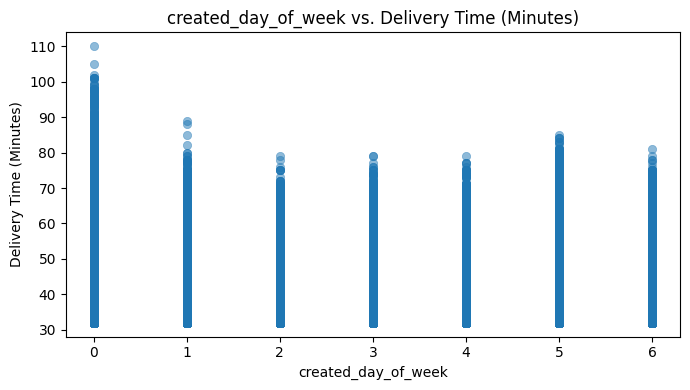

In [29]:
# Scatter plot to visualise the relationship between time_taken and other features

for col in numerical_cols:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.5, edgecolor=None)
    plt.title(f'{col} vs. Delivery Time (Minutes)')
    plt.xlabel(col)
    plt.ylabel('Delivery Time (Minutes)')
    plt.tight_layout()
    plt.show()

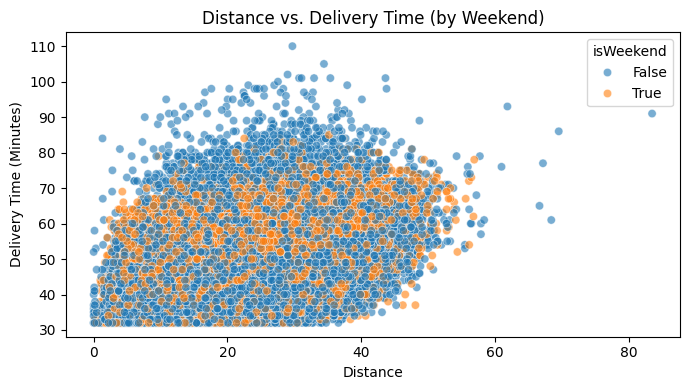

In [31]:
if 'isWeekend' in X_train.columns:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(x=X_train['distance'], y=y_train, hue=X_train['isWeekend'], alpha=0.6)
    plt.title('Distance vs. Delivery Time (by Weekend)')
    plt.xlabel('Distance')
    plt.ylabel('Delivery Time (Minutes)')
    plt.tight_layout()
    plt.show()

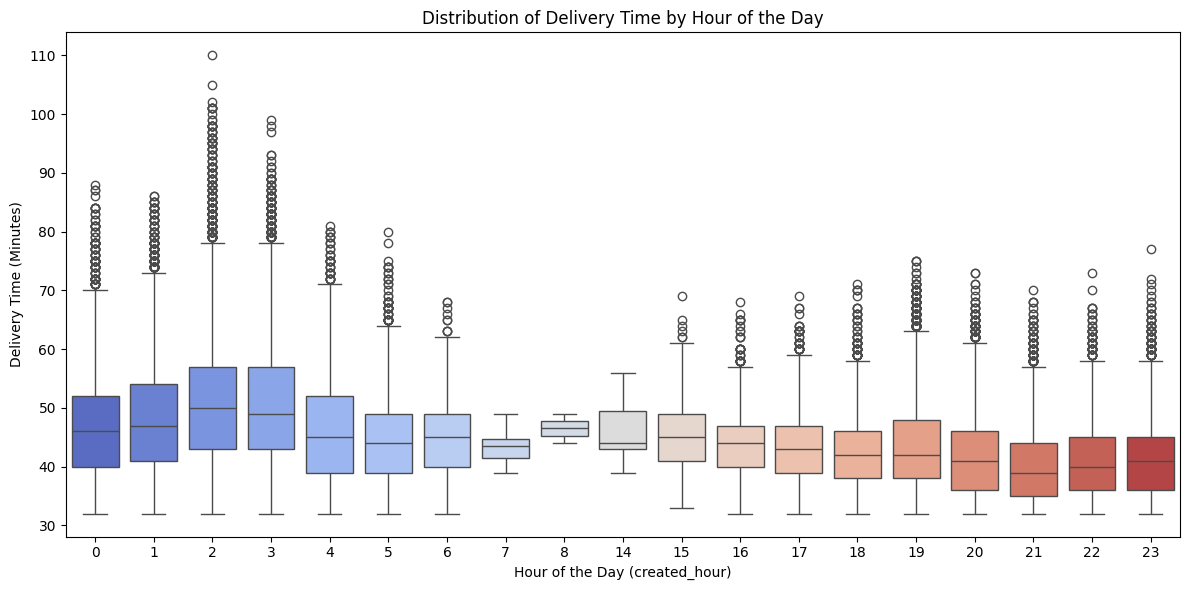

In [67]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(x=X_train['created_hour'], y=y_train, palette='coolwarm')
plt.title('Distribution of Delivery Time by Hour of the Day')
plt.xlabel('Hour of the Day (created_hour)')
plt.ylabel('Delivery Time (Minutes)')
plt.tight_layout()
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

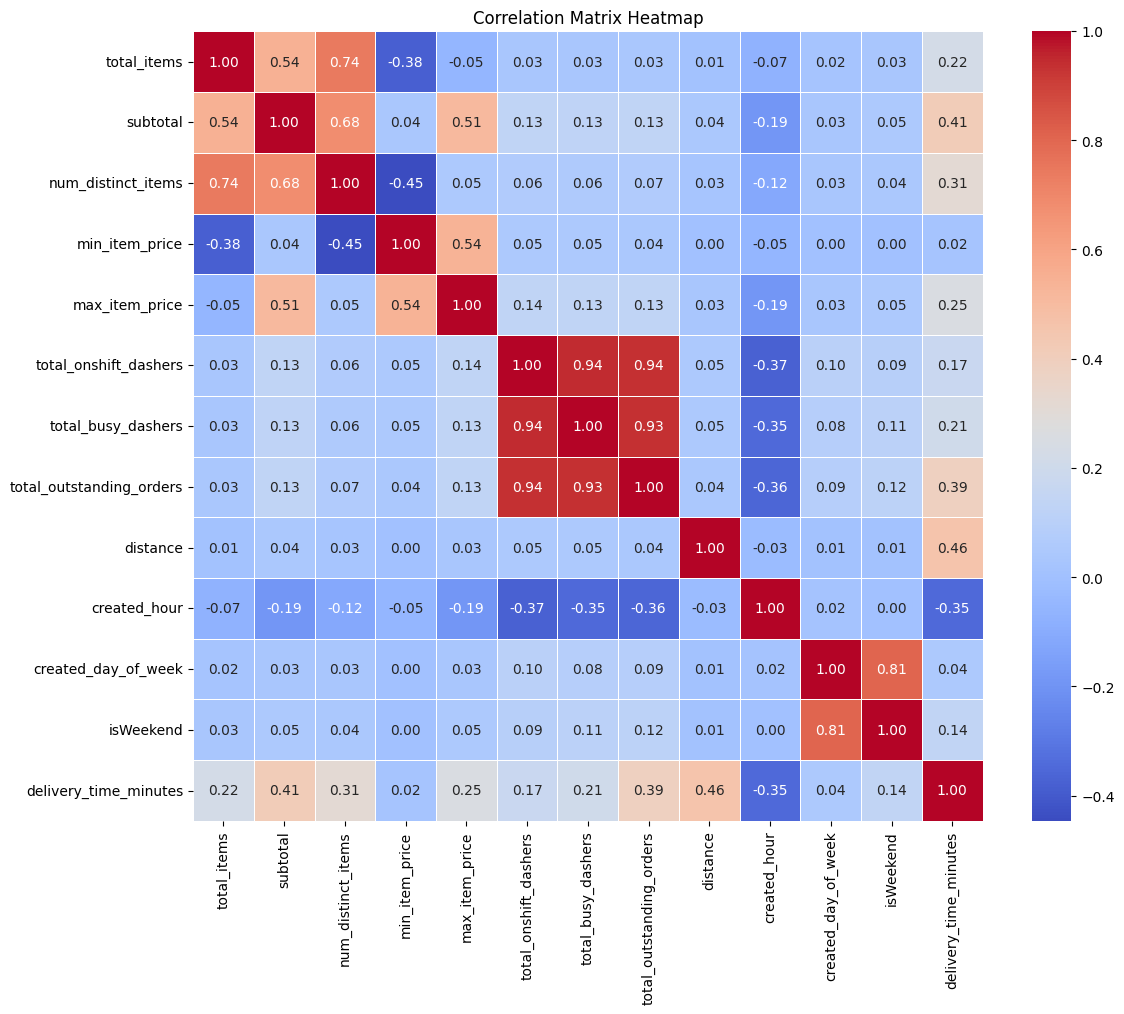

In [69]:
# Plot the heatmap of the correlation matrix

df_corr = X_train.copy()
df_corr['delivery_time_minutes'] = y_train

# Compute correlation matrix
corr_matrix = df_corr.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [71]:
# Drop 3-5 weakly correlated columns from training dataset

correlations = df_corr.corr(numeric_only=True)['delivery_time_minutes'].drop('delivery_time_minutes')
correlations.abs().sort_values()

min_item_price              0.021151
created_day_of_week         0.044897
isWeekend                   0.137057
total_onshift_dashers       0.171828
total_busy_dashers          0.206514
total_items                 0.220804
max_item_price              0.254650
num_distinct_items          0.312510
created_hour                0.345716
total_outstanding_orders    0.385028
subtotal                    0.413392
distance                    0.461026
Name: delivery_time_minutes, dtype: float64

In [73]:
features_to_drop = ["min_item_price", "created_day_of_week", "isWeekend", "total_onshift_dashers"]
X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

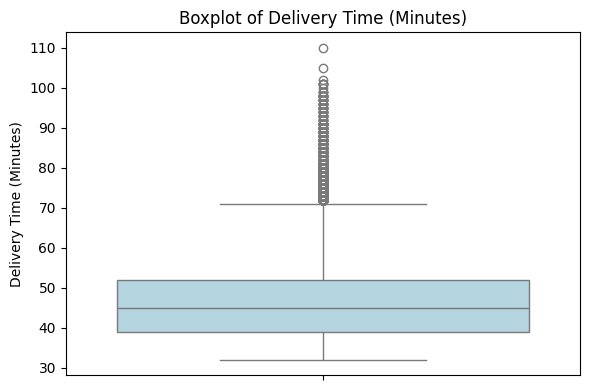

In [75]:
# Boxplot for time_taken
plt.figure(figsize=(6, 4))
sns.boxplot(y=y_train, color='lightblue')
plt.title('Boxplot of Delivery Time (Minutes)')
plt.ylabel('Delivery Time (Minutes)')
plt.tight_layout()
plt.show()


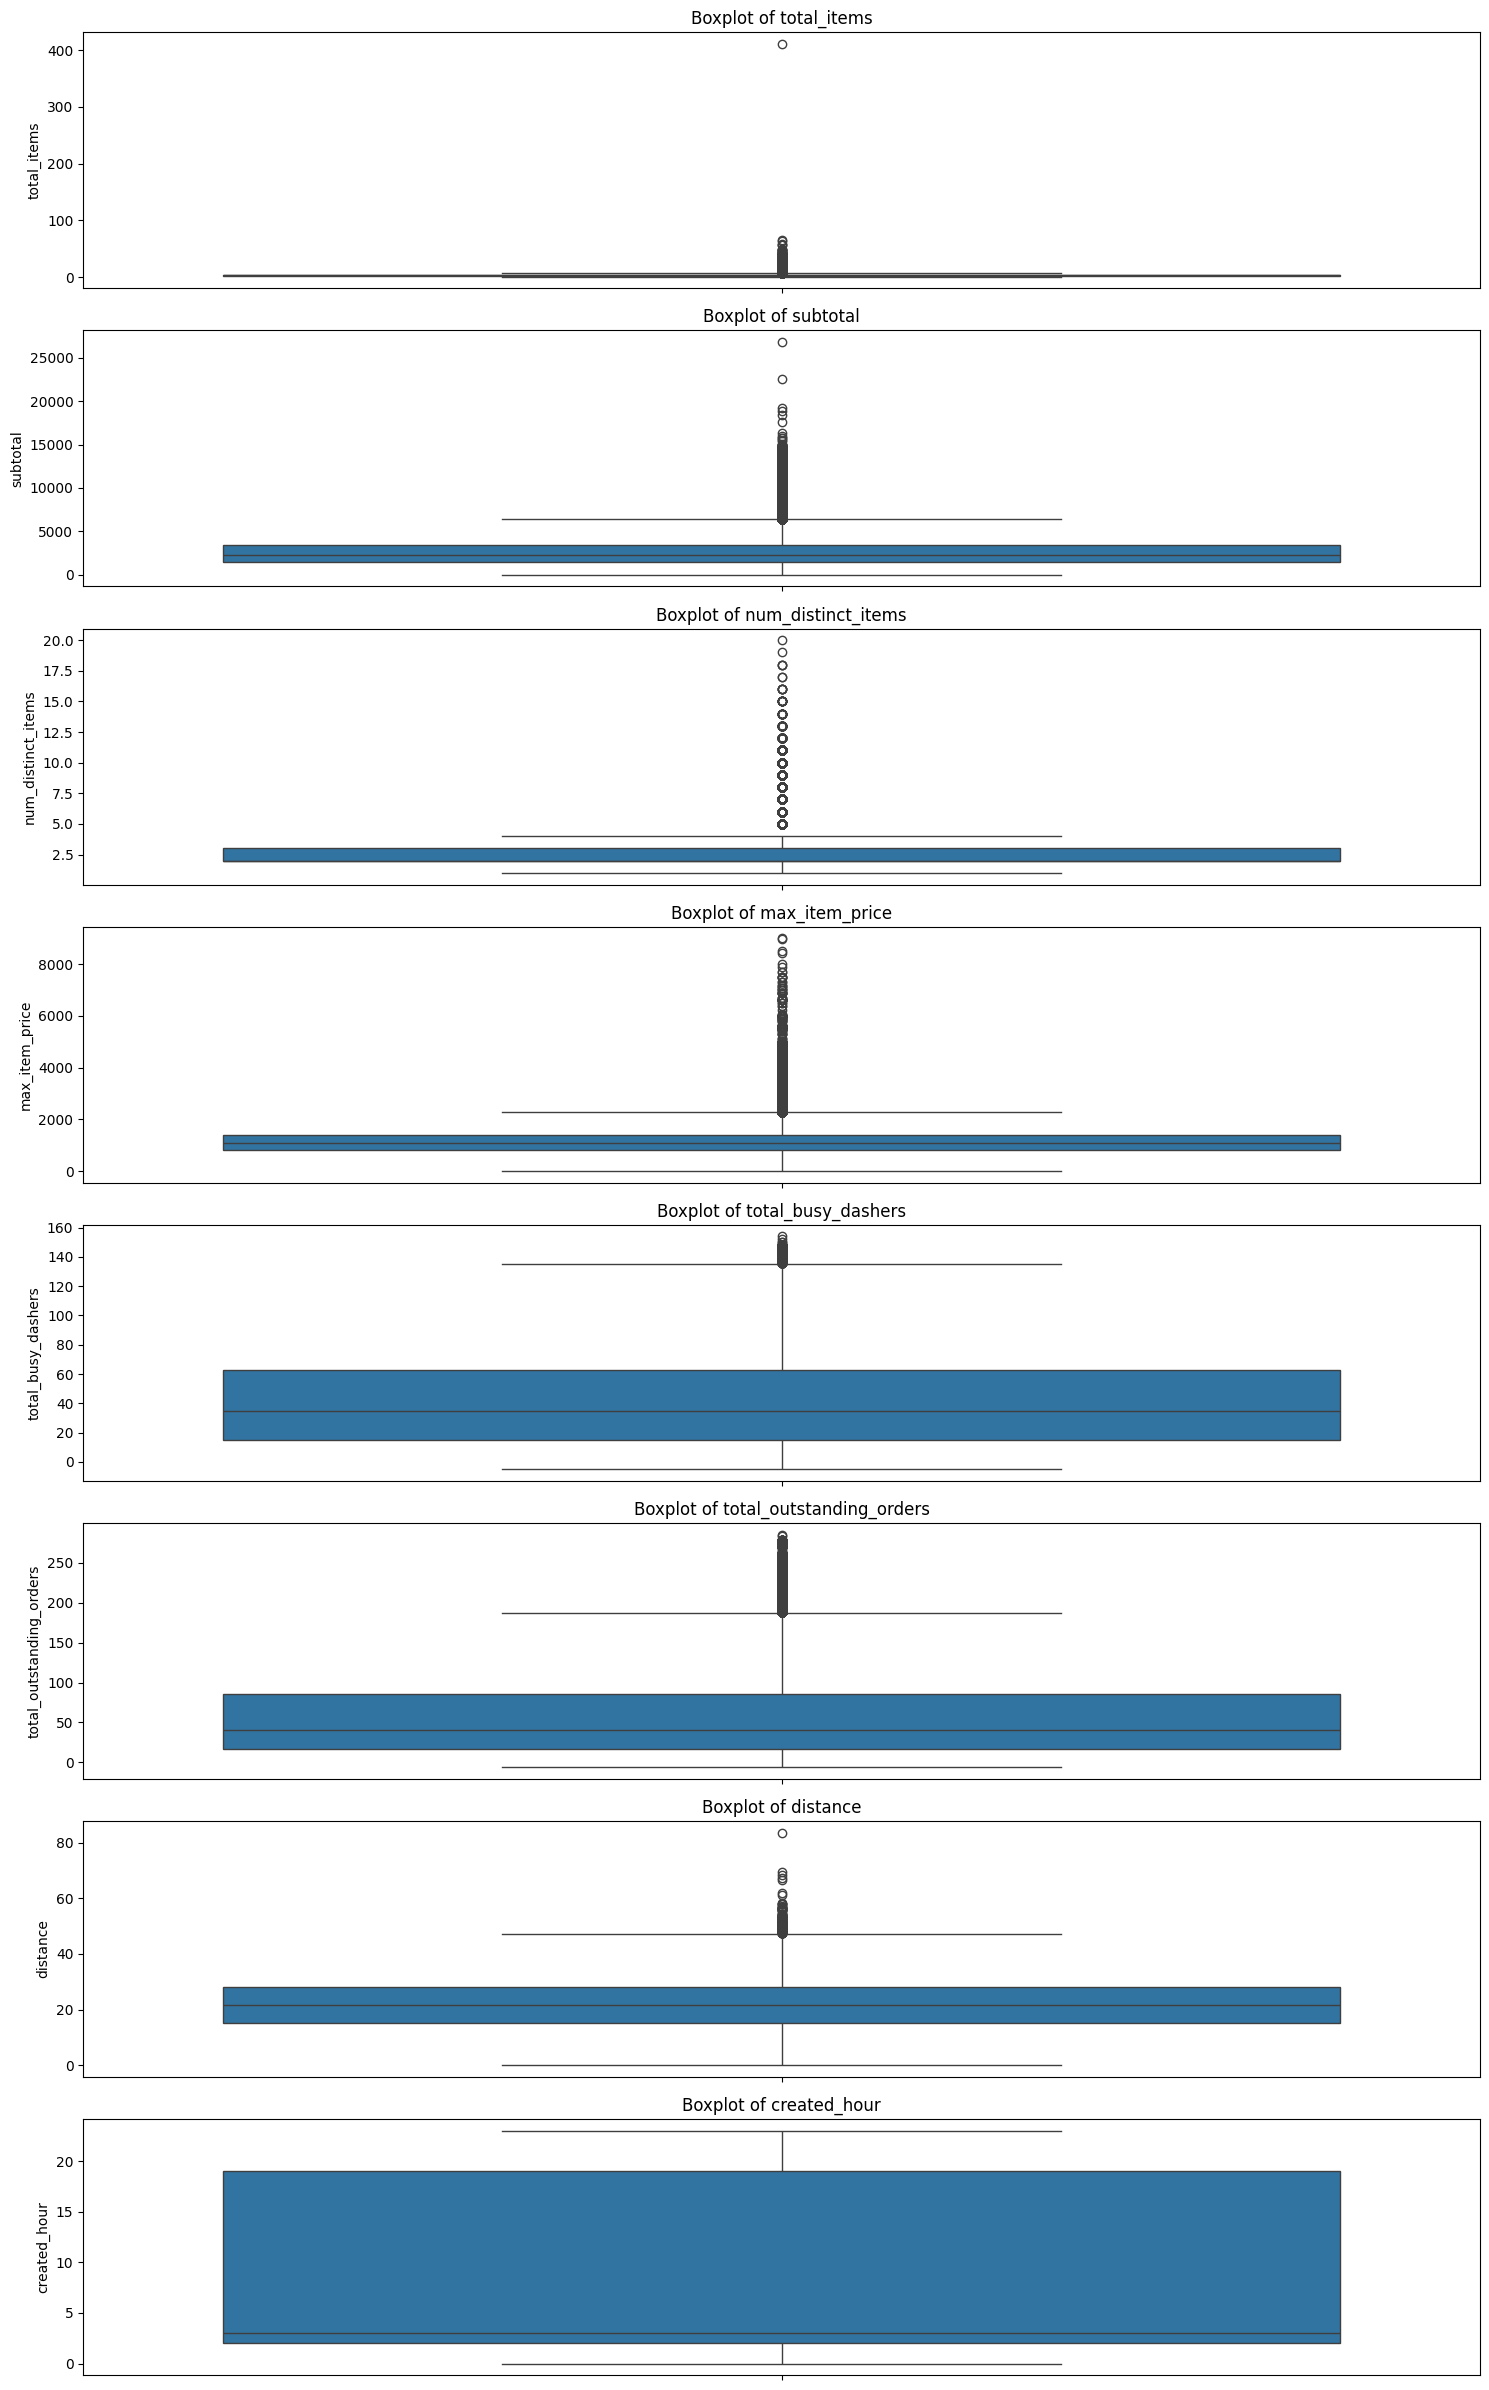

In [91]:
train_numerical_cols = X_train.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
plt.figure(figsize=(15, len(train_numerical_cols) * 3))
for i, col in enumerate(train_numerical_cols, 1):
    plt.subplot(len(train_numerical_cols), 1, i)
    sns.boxplot(y=X_train[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [107]:
# Handle outliers

numerical_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


df_cleaned = remove_outliers_iqr(df, numerical_cols)
print("Original shape:", df.shape)
print("After outlier removal:", df_cleaned.shape)


Original shape: (175777, 15)
After outlier removal: (144987, 15)


In [109]:
# Features and target
X = df_cleaned.drop(columns=['delivery_time_minutes']) 
y = df_cleaned['delivery_time_minutes']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [155]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [115]:
# Apply scaling to the numerical columns

# Identify numerical columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64', 'int32']).columns

scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [117]:
# Create/Initialise the model
model = LinearRegression()

In [119]:
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [121]:
# Make predictions
y_pred = model.predict(X_test)

In [123]:
# Find results for evaluation metrics

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 8.6861
Root Mean Squared Error (RMSE): 2.9472
R-squared (R²): 0.8642


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [129]:
# Loop through the number of features and test the model

# Store results
rfe_results = []

# Loop: from all features down to 1
for n in range(X_train.shape[1], 0, -1):
    rfe = RFE(estimator=model, n_features_to_select=n)
    rfe.fit(X_train, y_train)

    # Transform train/test sets to selected features
    X_train_rfe = X_train.loc[:, rfe.support_]
    X_test_rfe = X_test.loc[:, rfe.support_]

    # Train and predict
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Record results
    rfe_results.append({
        'n_features': n,
        'RMSE': rmse,
        'R2': r2,
        'Selected Features': list(X_train_rfe.columns)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(rfe_results)

# Sort and display top results
results_df.sort_values(by='R2', ascending=False, inplace=True)
print(results_df[['n_features', 'RMSE', 'R2']].head(10))


   n_features      RMSE        R2
0          14  2.947220  0.864174
1          13  2.948161  0.864087
2          12  2.948176  0.864086
3          11  2.948382  0.864067
4          10  2.949581  0.863956
5           9  2.954247  0.863526
6           8  2.973967  0.861698
7           7  3.126156  0.847181
8           6  3.206635  0.839211
9           5  3.741311  0.781121


In [183]:
# Build the final model with selected number of features
selected_features = results_df.loc[results_df['n_features'] == 8, 'Selected Features'].values[0]
print(selected_features)
X_train_final = X_train[selected_features]
X_test_final = X_test[selected_features]

final_model = LinearRegression()
final_model.fit(X_train_final, y_train)
y_pred_final = final_model.predict(X_test_final)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_final)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred_final)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


# Assuming selected_features is a list of feature names
coefficients = final_model.coef_

# Create a DataFrame to view feature impacts nicely
feature_impact = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficient to see most impactful features first
feature_impact['abs_coef'] = feature_impact['Coefficient'].abs()
feature_impact = feature_impact.sort_values(by='abs_coef', ascending=False).drop(columns='abs_coef')

print(feature_impact)




['order_protocol', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'created_hour', 'isWeekend']
Mean Squared Error (MSE): 8.8445
Root Mean Squared Error (RMSE): 2.9740
R-squared (R²): 0.8617
                    Feature  Coefficient
4  total_outstanding_orders    15.321110
2     total_onshift_dashers   -11.423039
5                  distance     4.052884
3        total_busy_dashers    -3.785506
6              created_hour    -2.073142
1                  subtotal     2.023102
7                 isWeekend     1.532134
0            order_protocol    -0.655464


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

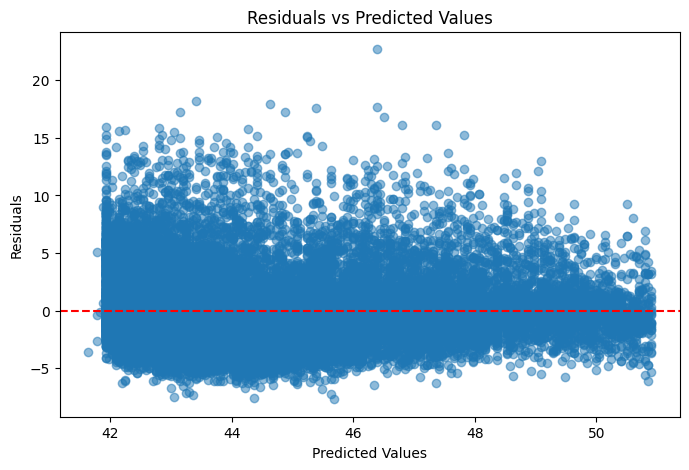

<Figure size 800x500 with 0 Axes>

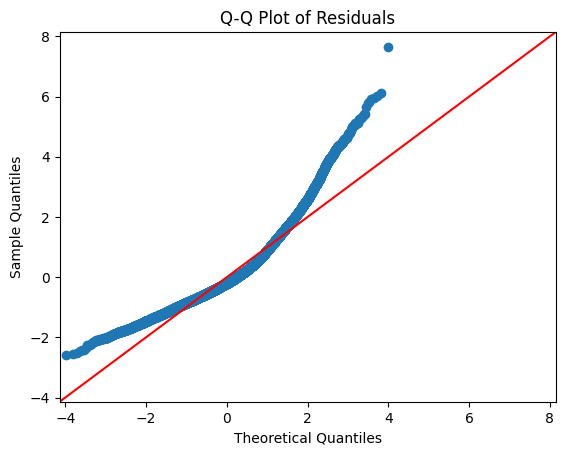

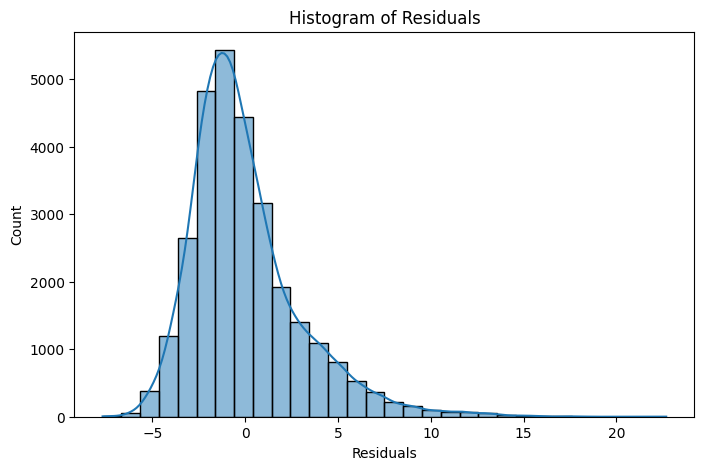

In [163]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# Calculate residuals
residuals = y_test - y_pred_final

# 1. Residuals vs Predicted Values plot
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# 2. Q-Q Plot of residuals to check normality
plt.figure(figsize=(8,5))
sm.qqplot(residuals, line ='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

# 3. Histogram of residuals
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [201]:
# Compare the scaled vs unscaled features used in the final model

# Features and target
X = df_cleaned.drop(columns=['delivery_time_minutes']) 
y = df_cleaned['delivery_time_minutes']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit model on unscaled features
final_model_unscaled = LinearRegression()
final_model_unscaled.fit(X_train, y_train)
coef_unscaled = final_model_unscaled.coef_

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit model on scaled features
final_model_scaled = LinearRegression()
final_model_scaled.fit(X_train_scaled, y_train)
coef_scaled = final_model_scaled.coef_

# Create a DataFrame comparing coefficients
coef_comparison = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient_Unscaled': coef_unscaled,
    'Coefficient_Scaled': coef_scaled
})

# Sort by absolute scaled coefficient to see strongest effects
coef_comparison['abs_scaled'] = coef_comparison['Coefficient_Scaled'].abs()
coef_comparison = coef_comparison.sort_values(by='abs_scaled', ascending=False).drop(columns='abs_scaled')

print(coef_comparison)



                     Feature  Coefficient_Unscaled  Coefficient_Scaled
9   total_outstanding_orders              0.355329           15.317352
7      total_onshift_dashers             -0.378660          -11.441234
10                  distance              0.469046            4.051097
8         total_busy_dashers             -0.132254           -3.766896
11              created_hour             -0.232848           -2.058959
3                   subtotal              0.001279            1.534662
1             order_protocol             -0.650867           -0.989667
13                 isWeekend              1.467379            0.687054
4         num_distinct_items              0.551280            0.672825
6             max_item_price              0.000506            0.191478
5             min_item_price              0.000207            0.084129
0     store_primary_category              0.003737            0.078155
2                total_items             -0.052282           -0.076193
12    

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [207]:
# Analyze the effect of a unit change in a feature, say 'total_items'

feature_index = list(X_train.columns).index('total_items')
coef_total_items = final_model_unscaled.coef_[feature_index]

print(f"Effect of 1 unit increase in 'total_items': {coef_total_items:.4f}")

Effect of 1 unit increase in 'total_items': -0.0523


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> isWeekend is a categorical variable used as feature in final model and its coefficient is 1.53 which means if the value increases by 1 unit then target variable increases at 1.53 times



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> The test_size=0.2 parameter in train_test_split refers to the proportion of the dataset that will be used to the test set.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> As per heat map , distance has the highest correlation with target variable



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>We have used IQR approach to detect the outliers and have dropped those records



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>Below are the 3 top features which significantly affect
>4  total_outstanding_orders    15.321110
2     total_onshift_dashers   -11.423039
5                  distance     4.052884



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>
Linear Regression algorithm is a supervised learning algorithm similar to logistic regression used to model the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data.
>
the standard equation is defined as Y = β₀ + β₁X
>
> Regression is the most commonly used predictive analysis model.
>



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> The key difference between simple and multiple linear regression lies in the number of input (independent) variables used to predict the output (dependent) variable where simple linear regression uses one independent and multiple uses more than one independent variables.
>
> Equation for simple linear Y = β₀ + β₁X
>
> Equation for multiple linear Y =  β₀ + β₁X1 + β2X2 + .....





---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>
The cost function in linear regression provides the error between the predicted values and the actual target values. It measures how well the model's predictions fit the data.
>
>The goal of training is to minimize this cost, a poorly minimized cost function leads to inaccurate predictions
>



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.




**Answer:**

> When a model learns the training data too well, including noise and outliers it ends up into overfitting , It memorizes the training data, rather than generalizing patterns.

When a model is too simple to capture the underlying patterns in the data, It fails to learn enough from the training data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>
Helps check if the linear regression assumptions hold.

Reveals if the model missed important patterns.

Detects problems like heteroscedasticity, autocorrelation, or non-linearity.

Guides you on how to improve the model.